In [ ]:
!pip install keras_unet_collection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
from PIL import Image
from skimage.transform import resize
import numpy as np
from numpy.random import seed
seed(1337)
from glob import glob
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
#from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
#from keras.models import load_model
from sklearn.metrics import f1_score, jaccard_score
import os
import glob
# import cv2
import numpy as np
from matplotlib import pyplot as plt
#from keras.layers.normalization import layer_normalization
from tensorflow.keras.utils import normalize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_folder = "/content/drive/MyDrive/Amit (1)/DATASET/X_train"  # Path to the directory containing input images
mask_folder = "/content/drive/MyDrive/Amit (1)/DATASET/Y_train"  # Path to the directory containing corresponding masks



In [ ]:
image_files = sorted(os.listdir(image_folder))
image_files.sort()


In [ ]:
train_images = []
train_masks = []

In [ ]:
#Resizing images,
SIZE_X = 256
SIZE_Y = 256
n_classes=4 #Number of classes for segmentation

#Capture training image info as a list
train_images = []

for directory_path in glob.glob("/content/drive/MyDrive/Amit (1)/DATASET/X_train"):
# for directory_path in glob.glob("X_train_tif_good/"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = Image.open(img_path).convert("L")  # Read image and convert to grayscale

        img = np.array(img)  # Convert image to NumPy array

        img = resize(img, (SIZE_Y, SIZE_X), anti_aliasing=True)  # Resize image
        train_images.append(img)

#Convert list to array for machine learning processing
train_images = np.array(train_images)
print(train_images.shape)
print(np.unique(train_images))

(1550, 256, 256)
[0.00000000e+00 3.00483911e-16 3.65638846e-16 ... 9.99728189e-01
 9.99766360e-01 9.99885976e-01]


In [ ]:
# from PIL import Image
# import numpy as np
# from skimage.transform import resize

# train_masks = []
# for directory_path in glob.glob("/workspace/lv_seg dataset1/data/Y_train"):
#     for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
#         mask = Image.open(mask_path).convert("L")  # Read and convert the mask image to grayscale
#         mask = np.array(mask)  # Convert mask image to NumPy array

#         # Resize the mask image using scikit-image's resize function
#         mask = resize(mask, (SIZE_Y, SIZE_X), order=0, anti_aliasing=False, preserve_range=True)

#         train_masks.append(mask)

# # Convert the list of masks to a NumPy array for machine learning processing
# train_masks = np.array(train_masks)

# print(train_masks.shape)
# print(np.unique(train_masks))

# for i, mask in enumerate(train_masks):
#     print(f"Unique classes in sample {i} ({os.path.basename(mask_path)}): {np.unique(mask)}")

In [ ]:
from PIL import Image
import numpy as np
from skimage.transform import resize
import glob
import os

SIZE_Y = 256  # Update with your desired size
SIZE_X = 256  # Update with your desired size

desired_classes = [0, 29, 76, 150]

train_masks = []
file_names = []

for directory_path in glob.glob("/content/drive/MyDrive/Amit (1)/DATASET/Y_train"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = Image.open(mask_path).convert("L")  # Read and convert the mask image to grayscale
        mask = np.array(mask)  # Convert mask image to NumPy array

        # Remove classes other than the desired classes
        mask[np.logical_not(np.isin(mask, desired_classes))] = 0

        # Resize the mask image using scikit-image's resize function
        mask = resize(mask, (SIZE_Y, SIZE_X), order=0, anti_aliasing=False, preserve_range=True)

        train_masks.append(mask)
        file_names.append(os.path.basename(mask_path))

# Convert the list of masks to a NumPy array for machine learning processing
train_masks = np.array(train_masks)

print(train_masks.shape)
print(np.unique(train_masks))

for i, mask in enumerate(train_masks):
    print(f"Unique classes in sample {i} ({file_names[i]}): {np.unique(mask)}")


(1550, 256, 256)
[  0  29  76 150]
Unique classes in sample 0 (p773_gt.png): [  0  29  76 150]
Unique classes in sample 1 (p774_gt.png): [  0  29  76 150]
Unique classes in sample 2 (p775_gt.png): [  0  29  76 150]
Unique classes in sample 3 (p776_gt.png): [  0  29  76 150]
Unique classes in sample 4 (p777_gt.png): [  0  29  76 150]
Unique classes in sample 5 (p778_gt.png): [  0  29  76 150]
Unique classes in sample 6 (p779_gt.png): [  0  29  76 150]
Unique classes in sample 7 (p780_gt.png): [  0  29  76 150]
Unique classes in sample 8 (p781_gt.png): [  0  29  76 150]
Unique classes in sample 9 (p782_gt.png): [  0  29  76 150]
Unique classes in sample 10 (p783_gt.png): [  0  29  76 150]
Unique classes in sample 11 (p784_gt.png): [  0  29  76 150]
Unique classes in sample 12 (p785_gt.png): [  0  29  76 150]
Unique classes in sample 13 (p786_gt.png): [  0  29  76 150]
Unique classes in sample 14 (p787_gt.png): [  0  29  76 150]
Unique classes in sample 15 (p788_gt.png): [  0  29  76 150]

In [ ]:
print(train_images.shape)
print(train_masks.shape)

(1550, 256, 256)
(1550, 256, 256)


In [ ]:
print(np.unique(train_masks))

[  0  29  76 150]


Unique classes in sample 10 (p1007.png): [  0  29  76 150]


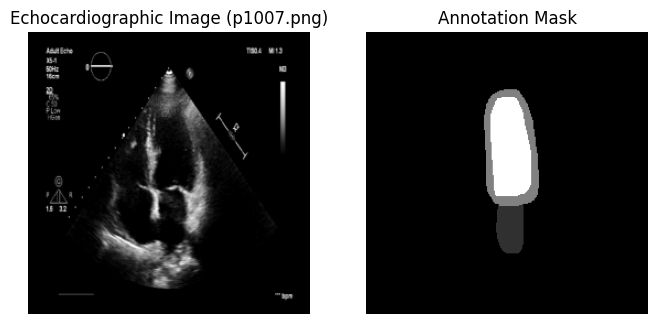

Unique classes in sample 11 (p1008.png): [  0  29  76 150]


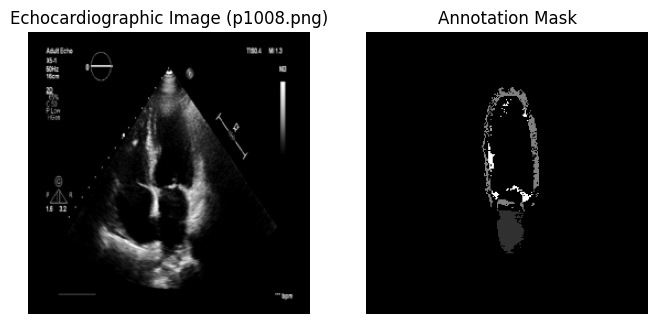

Unique classes in sample 12 (p1009.png): [  0  29  76 150]


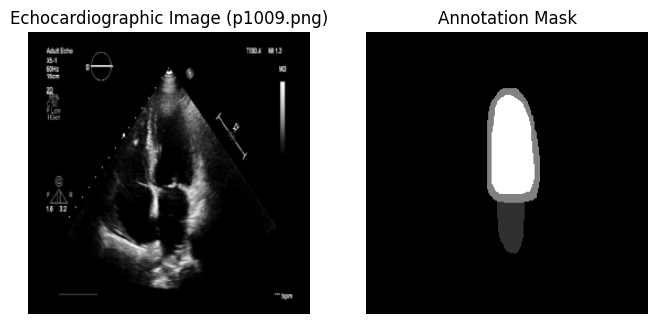

Unique classes in sample 13 (p101.png): [  0  29  76 150]


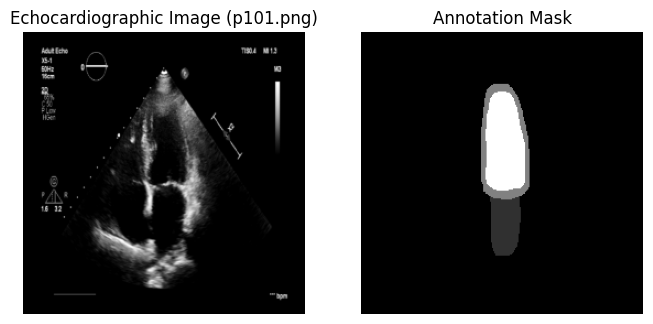

Unique classes in sample 14 (p1010.png): [  0  29  76 150]


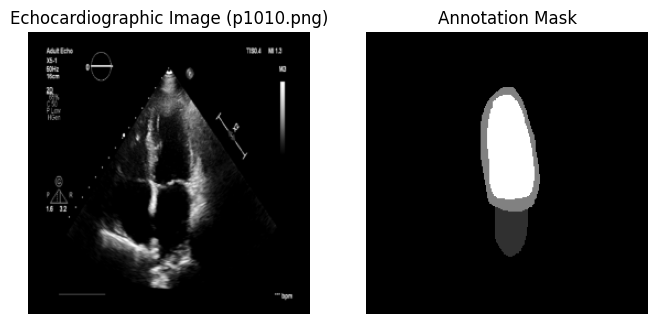

Unique classes in sample 15 (p1011.png): [  0  29  76 150]


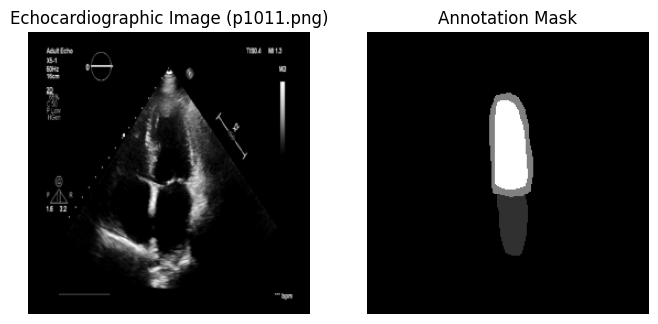

Unique classes in sample 16 (p1012.png): [  0  29  76 150]


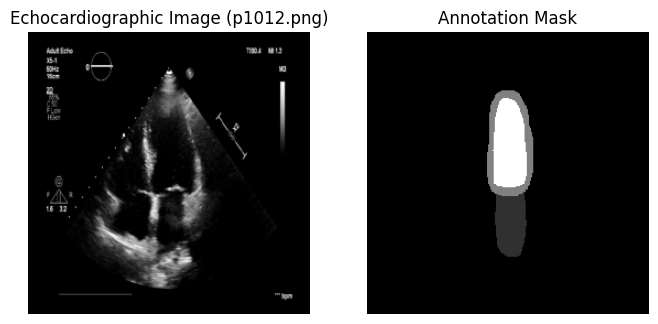

Unique classes in sample 17 (p1013.png): [  0  29  76 150]


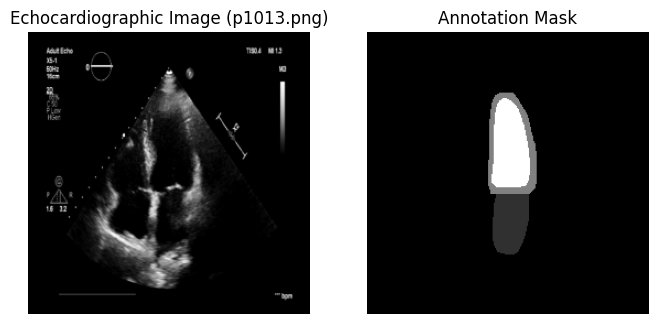

Unique classes in sample 18 (p1014.png): [  0  29  76 150]


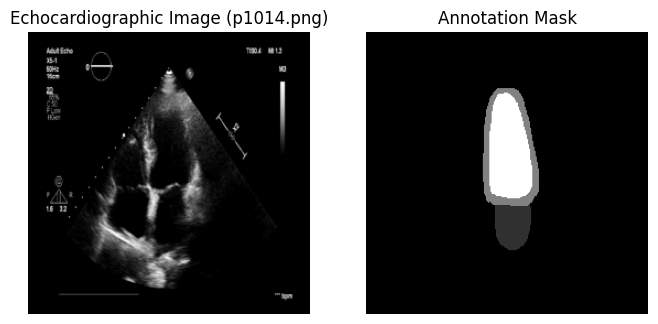

Unique classes in sample 19 (p1015.png): [  0  29  76 150]


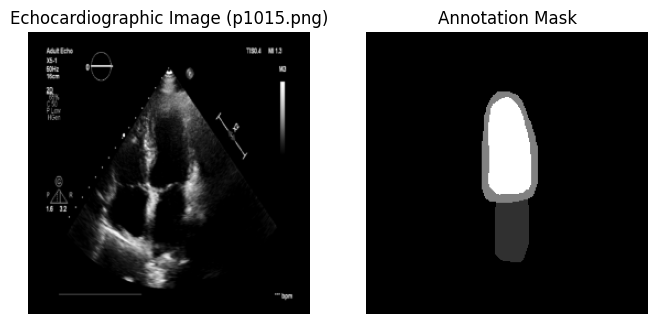

In [ ]:
import matplotlib.pyplot as plt

# Iterate over the first 10 image filenames and their corresponding masks
for i in range(10,20):
    image_file = image_files[i]
    mask = train_masks[i]

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.subplot(121)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Echocardiographic Image ({image_file})")
    plt.axis('off')

    # Display the corresponding annotation mask
    plt.subplot(122)
    plt.imshow(mask, cmap='gray')
    plt.title("Annotation Mask")
    plt.axis('off')

    # Show the unique pixel values in the annotation mask
    unique_classes = np.unique(mask)
    print(f"Unique classes in sample {i} ({image_file}): {unique_classes}")

    plt.show()


In [ ]:
# Sort the image file list
image_files.sort()

# Initialize a counter for images with more than 4 unique classes
count_images_more_than_4_classes = 0

# Iterate over all the sorted image filenames and their corresponding masks
for i in range(len(image_files)):
    mask = train_masks[i]

    # Calculate the unique classes in the annotation mask
    unique_classes = np.unique(mask)

    # Check if the number of unique classes is greater than 4
    if len(unique_classes) > 4:
        count_images_more_than_4_classes += 1

# Print the count of images with more than 4 unique classes
print(f"Number of images with more than 4 unique classes: {count_images_more_than_4_classes}")


Number of images with more than 4 unique classes: 0


In [ ]:
# Sort the image file list
image_files.sort()

# Initialize a counter for images with more than 4 unique classes
count_images_more_than_4_classes = 0

# List to store the names of images with more than 4 unique classes
images_more_than_4_classes = []

# Iterate over all the sorted image filenames and their corresponding masks
for i in range(len(image_files)):
    image_file = image_files[i]
    mask = train_masks[i]

    # Calculate the unique classes in the annotation mask
    unique_classes = np.unique(mask)

    # Check if the number of unique classes is greater than 4
    if len(unique_classes) > 4:
        count_images_more_than_4_classes += 1
        images_more_than_4_classes.append(image_file)

# Print the count of images with more than 4 unique classes and their names
print(f"Number of images with more than 4 unique classes: {count_images_more_than_4_classes}")
print("Names of images with more than 4 unique classes:")
for image_name in images_more_than_4_classes:
    print(image_name)


Number of images with more than 4 unique classes: 0
Names of images with more than 4 unique classes:


In [ ]:
print("train_images shape:", train_images.shape)
print("train_masks shape:", train_masks.shape)

train_images shape: (1550, 256, 256)
train_masks shape: (1550, 256, 256)


In [ ]:
train_images = np.expand_dims(train_images, axis=-1)
train_masks = np.expand_dims(train_masks, axis=-1)

print("Expanded train_images shape:", train_images.shape)
print("Expanded train_masks shape:", train_masks.shape)


Expanded train_images shape: (1550, 256, 256, 1)
Expanded train_masks shape: (1550, 256, 256, 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the images and masks into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)




In [ ]:
# Print the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (992, 256, 256, 1)
y_train shape: (992, 256, 256, 1)
X_val shape: (248, 256, 256, 1)
y_val shape: (248, 256, 256, 1)
X_test shape: (310, 256, 256, 1)
y_test shape: (310, 256, 256, 1)


In [ ]:
import numpy as np

num_classes = 4

# Map label values to valid class indices
label_map = {0: 0, 29: 1, 76: 2, 150: 3}

# Convert target labels to one-hot encoded format
y_train_mapped = np.vectorize(label_map.get)(y_train)
y_val_mapped = np.vectorize(label_map.get)(y_val)
y_test_mapped = np.vectorize(label_map.get)(y_test)

y_train_one_hot = np.eye(num_classes)[y_train_mapped]
y_val_one_hot = np.eye(num_classes)[y_val_mapped]
y_test_one_hot = np.eye(num_classes)[y_test_mapped]

print(y_train_one_hot.shape)
print(y_val_one_hot.shape)
print(y_test_one_hot.shape)


(992, 256, 256, 1, 4)
(248, 256, 256, 1, 4)
(310, 256, 256, 1, 4)


In [ ]:
# Reshape target labels
y_train_one_hot = np.reshape(y_train_one_hot, (y_train_one_hot.shape[0], 256, 256, num_classes))
y_val_one_hot = np.reshape(y_val_one_hot, (y_val_one_hot.shape[0], 256, 256, num_classes))
y_test_one_hot = np.reshape(y_test_one_hot, (y_test_one_hot.shape[0], 256, 256, num_classes))

print(y_train_one_hot.shape)
print(y_val_one_hot.shape)
print(y_test_one_hot.shape)

(992, 256, 256, 4)
(248, 256, 256, 4)
(310, 256, 256, 4)


In [ ]:
!pip install keras



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.8 MB/s eta 0:00:00


In [ ]:
from keras_unet_collection import models

In [ ]:

model = models.swin_unet_2d((256, 256, 1), filter_num_begin=64, n_labels=4, depth=4, stack_num_down=2, stack_num_up=2,
                            patch_size=(2,2), num_heads=[4, 8, 8, 8], window_size=[4, 2, 2, 2], num_mlp=512,
                            output_activation='Softmax', shift_window=True, name='swin_unet')

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "swin_unet_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 patch_extract (patch_extract)  (None, 16384, 4)     0           ['input_1[0][0]']                
                                                                                                  
 patch_embedding (patch_embeddi  (None, 16384, 64)   1048896     ['patch_extract[0][0]']          
 ng)                                                                                              
                                                                                    

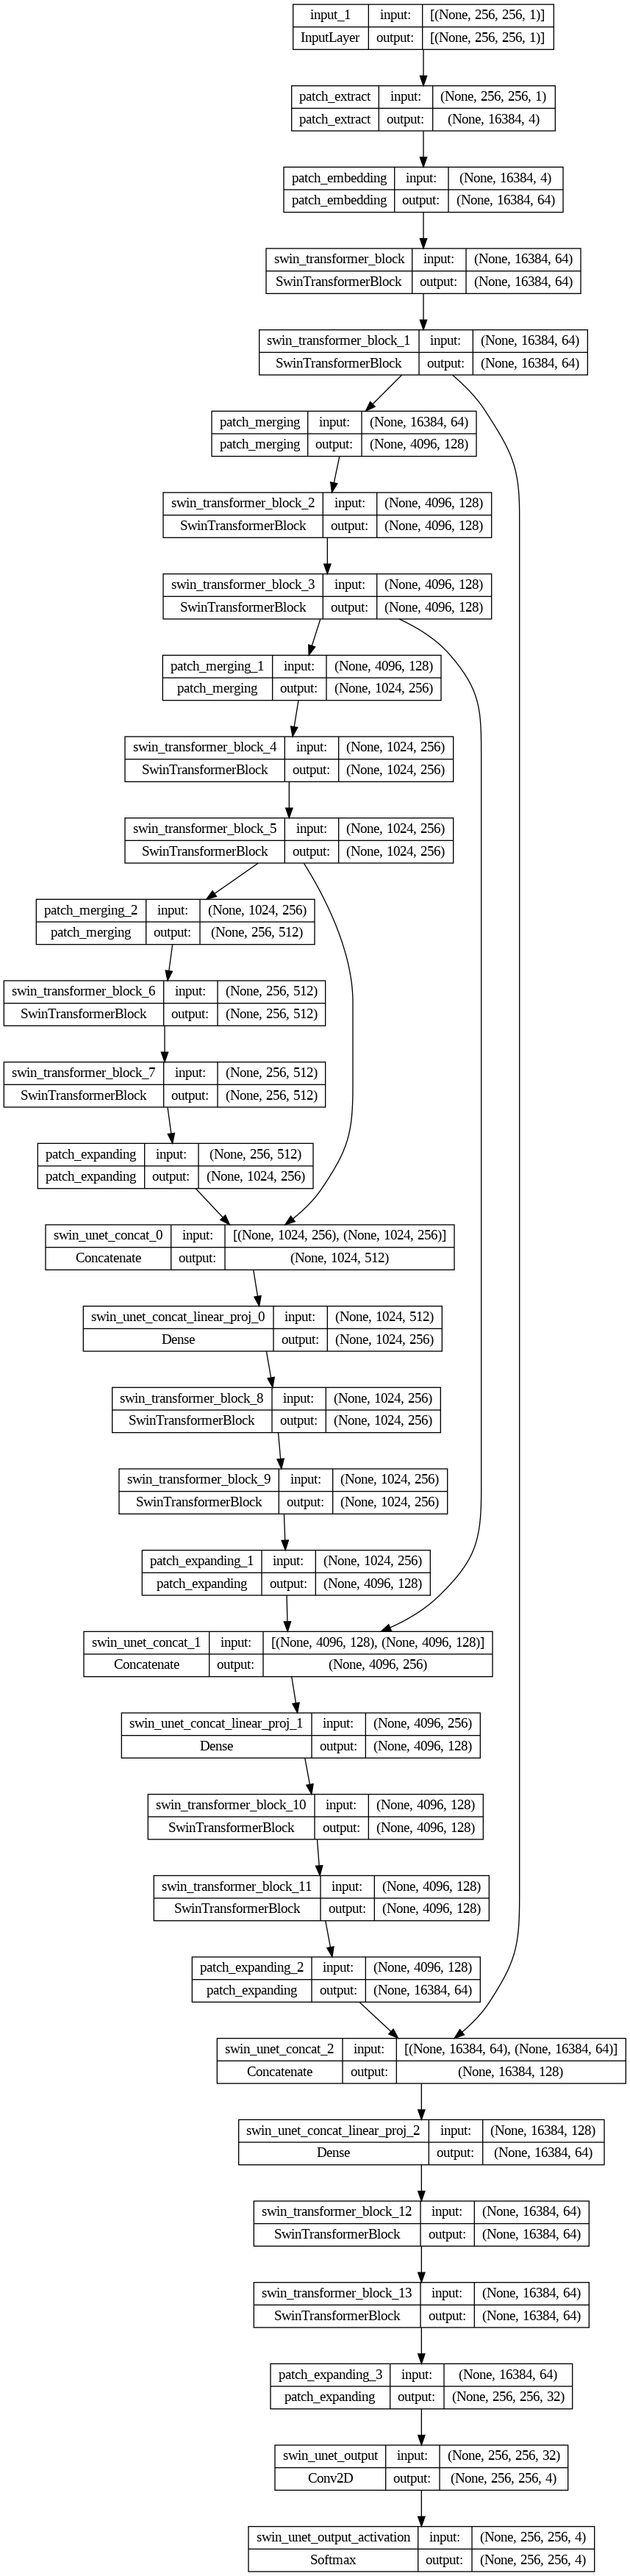

In [ ]:
tf.keras.utils.plot_model(model,to_file="/content/drive/MyDrive/Amit (1)/new/swin_unet.png",show_shapes=True,show_layer_names=True)

In [ ]:
print(y_train_one_hot.shape)
print(y_val_one_hot.shape)

(992, 256, 256, 4)
(248, 256, 256, 4)


In [ ]:
# Fit the model
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot), batch_size=8, epochs=80)


Epoch 1/80
124/124 [==============================] - 167s 869ms/step - loss: 0.1988 - accuracy: 0.9341 - val_loss: 0.0844 - val_accuracy: 0.9676
Epoch 2/80
124/124 [==============================] - 107s 861ms/step - loss: 0.0821 - accuracy: 0.9682 - val_loss: 0.0737 - val_accuracy: 0.9703
Epoch 3/80
124/124 [==============================] - 107s 861ms/step - loss: 0.0717 - accuracy: 0.9716 - val_loss: 0.0755 - val_accuracy: 0.9702
Epoch 4/80
124/124 [==============================] - 107s 861ms/step - loss: 0.0659 - accuracy: 0.9738 - val_loss: 0.0632 - val_accuracy: 0.9745
Epoch 5/80
124/124 [==============================] - 107s 860ms/step - loss: 0.0615 - accuracy: 0.9758 - val_loss: 0.0603 - val_accuracy: 0.9757
Epoch 6/80
124/124 [==============================] - 107s 861ms/step - loss: 0.0599 - accuracy: 0.9762 - val_loss: 0.0598 - val_accuracy: 0.9759
Epoch 7/80
124/124 [==============================] - 107s 862ms/step - loss: 0.0565 - accuracy: 0.9775 - val_loss: 0.0571 -

In [ ]:
############################################################
#Evaluate the model
	# evaluate model



_, acc = model.evaluate(X_test, y_test_one_hot)

print("Accuracy is = ", (acc * 100.0), "%")

10/10 [==============================] - 15s 1s/step - loss: 0.1293 - accuracy: 0.9780
Accuracy is =  97.7953314781189 %


In [ ]:
# Save the model with a specific path
model.save('/content/drive/MyDrive/Amit (1)/new/swin_unet.h5')

# from tensorflow.keras.models import load_model

# # Load the saved model
# loaded_model = load_model('model.h5')

In [ ]:
# ###
# #plot the training and validation accuracy and loss at each epoch
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.savefig('/content/drive/MyDrive/Amit (1)/new/swin_unet_loss')
# plt.show()

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# plt.plot(epochs, acc, 'y', label='Training Accuracy')
# plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
# plt.title('Training and validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.savefig('/content/drive/MyDrive/Amit (1)/new/swin_unet_accuracy')
# plt.show()




In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

10/10 [==============================] - 14s 1s/step


In [ ]:
############################################################
#Evaluate the model
	# evaluate model



_, acc = model.evaluate(X_test, y_test_one_hot)

print("Accuracy is = ", (acc * 100.0), "%")

10/10 [==============================] - 11s 1s/step - loss: 0.1293 - accuracy: 0.9780
Accuracy is =  97.7953314781189 %


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_train_one_hot: ",y_train_one_hot.shape)


X_train shape: (992, 256, 256, 1)
y_train shape: (992, 256, 256, 1)
X_val shape: (248, 256, 256, 1)
y_val shape: (248, 256, 256, 1)
X_test shape:  (310, 256, 256, 1)
y_test shape: (310, 256, 256, 1)
y_train_one_hot:  (992, 256, 256, 4)
